# QDAC-II 2D scan


In [1]:
from time import sleep
import numpy as np
from IPython.display import Image, display
from qcodes_contrib_drivers.drivers.QDevil import QDAC2
qdac_addr = '192.168.8.153'
qdac = QDAC2.QDac2('QDAC-II', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
import qcodes.instrument_drivers.rigol.DS1074Z as DS1000Z
rigol_addr = '192.168.8.199'
scope = DS1000Z.DS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jps/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jps/.qcodes/logs/211109-10727-qcodes.log
Connected to: QDevil QDAC-II (serial:48762, firmware:5-0.9.26) in 0.37s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.01s


In [2]:
qdac.reset()
scope.write('*rst')
sleep(3)

In [3]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [4]:
scope.write('chan1:disp off')
scope.write('chan2:disp on')
scope.write('chan2:bwl on')
scope.write('chan2:prob 1')
scope.write('chan2:scal 0.2')
scope.write('chan2:offs 0.0')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.2')
scope.write('chan3:offs 0.0')
scope.write('chan4:disp on')
scope.write('chan4:bwl on')
scope.write('chan4:prob 1')
scope.write('chan4:scal 1')
scope.write('chan4:offs -2')
scope.write('trig:edge:sour chan2')
scope.write('trig:edge:level 0')
scope.write('tim:scal 20e-6')
scope.write('tim:offs 80e-6')

In [5]:
arrangement = qdac.arrange(
        # QDAC channels 2 & 3 connected to sample
        gates={'plunger2': 2, 'plunger3': 3},
        # DMM external trigger connected to QDAC Output Trigger 4
        output_triggers={'dmm': 4})

In [6]:
sweep = arrangement.virtual_sweep2d(
        inner_gate='plunger2',
        inner_voltages=np.linspace(-0.2, 0.6, 5),
        outer_gate='plunger3',
        outer_voltages=np.linspace(-0.7, 0.15, 4),
        inner_step_time_s=10e-6,
        inner_step_trigger='dmm')

In [7]:
scope.write('sing')
sleep(3)
sweep.start()

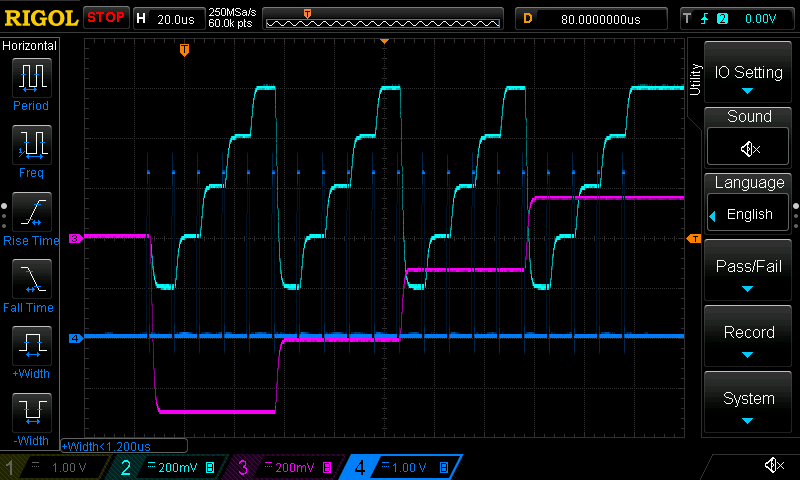

In [8]:
capture()